# Topic Modeling Assessment - Due by 9/4/2020 - 4pm

For this assignment you will be working with a dataset of  quora questions (please download from eLearning) that have no labeled cateogry and attempt to find representtaive topics for the questions. Try different topic modeling appraoches discussed in the class. 

The choice of number of topics will depend on what number gives you meaningful topics. Please explain different topics that you have extracted.

In [1]:
!pip install fbpca

You should consider upgrading via the 'c:\users\14699\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [4]:
df = pd.read_csv("quora_questions.csv")
df.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [9]:
train_vectors = tfidf.fit_transform(df['Question']) 
train_vectors.shape # (documents, vocab)

(404289, 38669)

In [11]:
vocab = np.array(tfidf.get_feature_names())

In [13]:
vocab.shape

(38669,)

In [14]:
vocab[8000:8050]

array(['competing', 'competition', 'competitions', 'competitive',
       'competitively', 'competitiveness', 'competitor', 'competitors',
       'compilation', 'compile', 'compiled', 'compiler', 'compilers',
       'compiling', 'complacency', 'complain', 'complaining', 'complains',
       'complaint', 'complaints', 'complement', 'complementary',
       'complete', 'completed', 'completely', 'completes', 'completing',
       'completion', 'completly', 'complex', 'complexes', 'complexion',
       'complexities', 'complexity', 'compliance', 'compliant',
       'complicate', 'complicated', 'complications', 'complicit',
       'compliment', 'complimentary', 'compliments', 'comply',
       'component', 'components', 'compose', 'composed', 'composer',
       'composers'], dtype='<U28')

## Non-negative Matrix Factorization (NMF)

In [16]:
from sklearn.decomposition import NMF

In [18]:
model = NMF(n_components=5,random_state=42)

In [20]:
model.fit(train_vectors)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [21]:
len(tfidf.get_feature_names())

38669

In [23]:
import random

In [25]:
for i in range(10):
    random_word_id = random.randint(0,16741)
    print(tfidf.get_feature_names()[random_word_id])

chili
carbohydrates
cinemark
cancels
buyucoin
3ds
died
6457
ap
bars


In [27]:
len(model.components_)

5

In [29]:
model.components_

array([[0.00026329, 0.04724485, 0.00004083, ..., 0.00000064, 0.        ,
        0.00000064],
       [0.00155815, 0.00182366, 0.00003141, ..., 0.00000396, 0.00269351,
        0.00000396],
       [0.00002731, 0.        , 0.00000242, ..., 0.        , 0.        ,
        0.        ],
       [0.00083981, 0.05857835, 0.        , ..., 0.00000129, 0.        ,
        0.00000129],
       [0.00105931, 0.00796706, 0.        , ..., 0.00001407, 0.        ,
        0.00001407]])

In [31]:
len(model.components_[0])

38669

In [33]:
single_topic = model.components_[0]

In [35]:
single_topic.argsort()

array([24016, 24960, 14616, ..., 20023, 37515,  4632], dtype=int64)

In [37]:
single_topic[24016]

0.0

In [39]:
single_topic[4632]

6.75546015638748

In [41]:
single_topic.argsort()[-10:]

array([12209, 19824, 22925, 27370,  5268,  5283, 17507, 20023, 37515,
        4632], dtype=int64)

In [43]:
top_word_indices = single_topic.argsort()[-10:]

In [45]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

english
language
movies
programming
book
books
india
learn
way
best


In [47]:
for index,topic in enumerate(model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['learning', 'time', 'weight', '2016', 'ways', 'english', 'language', 'movies', 'programming', 'book', 'books', 'india', 'learn', 'way', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['exist', 'compare', 'look', 'cost', 'really', 'girl', 'love', 'time', 'long', 'sex', 'work', 'feel', 'like', 'mean', 'does']


THE TOP 15 WORDS FOR TOPIC #2
['post', 'answered', 'use', 'improvement', 'delete', 'easily', 'asked', 'google', 'answer', 'answers', 'ask', 'question', 'people', 'questions', 'quora']


THE TOP 15 WORDS FOR TOPIC #3
['rs', 'easy', 'india', 'rupee', 'youtube', 'black', 'notes', 'ways', '1000', '500', 'way', 'earn', 'online', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #4
['president', 'meaning', 'important', 'thing', 'things', 'think', 'did', 'purpose', 'people', 'good', 'know', 'donald', 'india', 'trump', 'life']




In [49]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

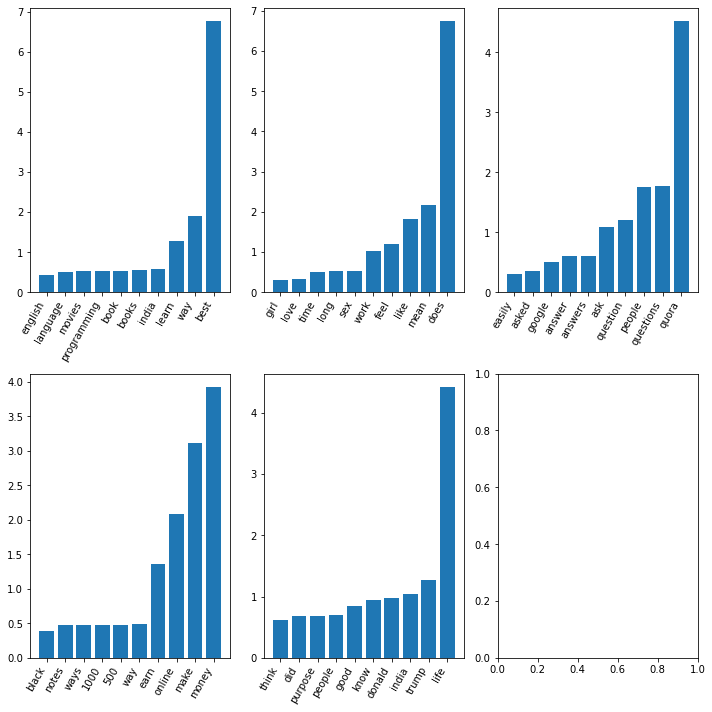

In [51]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 5
fig, axes = plt.subplots(2,3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), model.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

topic 1 - literature - since it has names related to literature.
topic 2 - girl - since it explains the behaviour of girls
topic 3 - search - since it explains things that are searched on internet
topic 4 - earn - since it involves ways to earn money
topic 5 - politics - since it explains politics

# LDA

In [55]:
from sklearn.decomposition import LatentDirichletAllocation

In [94]:
model1 = LatentDirichletAllocation(n_components=5,random_state=42)

In [95]:
model1.fit(train_vectors)

KeyboardInterrupt: 

In [58]:
len(tfidf.get_feature_names())

38669

In [59]:
import random

In [60]:
for i in range(10):
    random_word_id = random.randint(0,16741)
    print(tfidf.get_feature_names()[random_word_id])

contact
1100
collecting
disaccharides
hayden
flip
help
arnab
attendants
113


In [61]:
len(model.components_)

5

In [62]:
len(model.components_[0])

38669

In [63]:
single_topic = model.components_[0]

In [64]:
single_topic.argsort()

array([ 1311,  5885,  6557, ..., 17507, 11005,  4632], dtype=int64)

In [65]:
top_word_indices = single_topic.argsort()[-10:]

In [66]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

engineering
sex
way
mean
trump
like
good
india
does
best


In [67]:
for index,topic in enumerate(model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['life', 'make', 'president', 'donald', 'work', 'engineering', 'sex', 'way', 'mean', 'trump', 'like', 'good', 'india', 'does', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['india', 'good', 'think', 'ways', 'long', 'did', 'people', 'make', 'way', 'like', 'money', 'english', 'does', 'learn', 'best']


THE TOP 15 WORDS FOR TOPIC #2
['way', 'make', 'indian', 'people', 'books', 'use', 'really', 'like', 'did', 'india', 'time', 'good', 'life', 'does', 'best']


THE TOP 15 WORDS FOR TOPIC #3
['better', 'difference', 'good', 'way', 'world', 'improve', 'india', 'know', 'new', 'like', 'make', 'people', 'does', 'quora', 'best']


THE TOP 15 WORDS FOR TOPIC #4
['thing', 'lose', 'start', 'facebook', 'life', 'job', 'difference', 'don', 'weight', 'love', 'india', 'know', 'best', 'people', 'does']




In [68]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

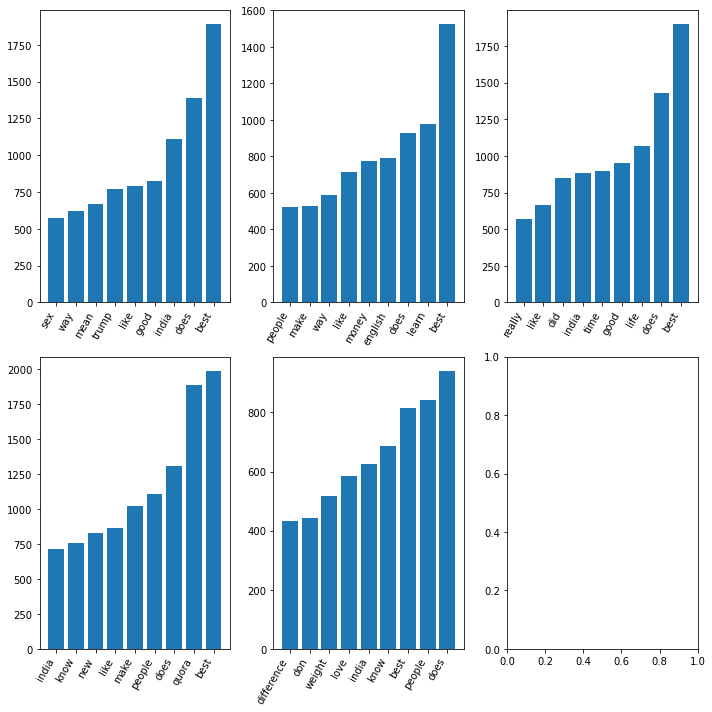

In [69]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 5
fig, axes = plt.subplots(2,3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), model.components_):
    plot_important_features(coef, feature_names, top_n=9, ax=ax)
    
plt.tight_layout()

In [ ]:
topic 1 -politics - since it explains politics.
topic 2 - earn - since it involves ways to earn money
topic 3 - positives - all of the good things explained
topic 4 - social
topic 5 - india

# Randomized Truncated SVD fb

In [71]:
import fbpca
u, s, v = fbpca.pca(train_vectors,5)

In [73]:
u.shape

(404289, 5)

In [75]:
s.shape

(5,)

In [77]:
v.shape

(5, 38669)

## Displaying Topics

In [78]:
len(tfidf.get_feature_names())

38669

In [79]:
import random

In [80]:
for i in range(10):
    random_word_id = random.randint(0,16741)
    print(tfidf.get_feature_names()[random_word_id])

buffett
4th
consolidate
congo
cried
caries
9v
freefall
adwards
hspa


In [81]:
len(v)

5

In [83]:
single_topic = v[0]

In [84]:
single_topic.argsort()

array([ 4632, 37515, 20023, ..., 21738, 25777, 11005], dtype=int64)

In [86]:
top_word_indices = single_topic.argsort()[-10:]

In [88]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

president
india
quora
work
think
donald
trump
mean
people
does


In [90]:
for index,topic in enumerate(v):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['use', 'good', 'make', 'hillary', 'clinton', 'president', 'india', 'quora', 'work', 'think', 'donald', 'trump', 'mean', 'people', 'does']


THE TOP 15 WORDS FOR TOPIC #1
['business', 'indian', 'work', 'phone', 'time', 'learning', 'language', 'learn', 'programming', 'feel', 'use', 'start', 'mean', 'good', 'does']


THE TOP 15 WORDS FOR TOPIC #2
['google', 'asked', 'improve', 'love', 'english', 'answers', 'answer', 'best', 'mean', 'ask', 'learn', 'question', 'questions', 'does', 'quora']


THE TOP 15 WORDS FOR TOPIC #3
['feel', 'improve', 'programming', 'love', 'language', 'make', 'new', 'english', 'mean', 'way', 'money', 'know', 'learn', 'like', 'does']


THE TOP 15 WORDS FOR TOPIC #4
['money', 'world', 'way', 'quora', 'time', 'does', 'war', 'work', 'movies', 'pakistan', 'difference', 'job', 'like', 'good', 'india']




In [92]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

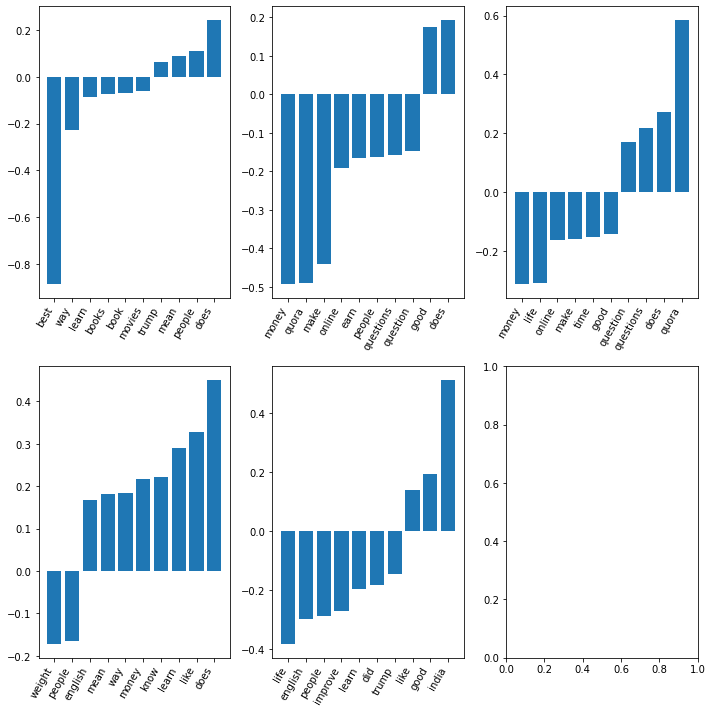

In [93]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 5
fig, axes = plt.subplots(2,3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), v):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

In [ ]:
topic 1 - politics 
topic 2 - search
topic 3 - search
topic 4 - literature
topic 5 - social

# Randomized Truncated SVD

In [96]:
from sklearn.decomposition import randomized_svd

In [97]:
u, s, v = randomized_svd(train_vectors,n_components=5)

In [98]:
u.shape

(404289, 5)

In [100]:
s.shape

(5,)

In [102]:
v.shape

(5, 38669)

In [104]:
len(tfidf.get_feature_names())

38669

In [106]:
import random

In [108]:
for i in range(10):
    random_word_id = random.randint(0,16741)
    print(tfidf.get_feature_names()[random_word_id])

bikers
goebbels
determined
astigmatism
entrainment
cucumbers
eigenvalues
graphs
blaze
gwalior


In [110]:
single_topic = v[0]

In [112]:
single_topic.argsort()

array([ 5802, 16925, 35331, ..., 20023, 37515,  4632], dtype=int64)

In [114]:
single_topic.argsort()[-10:]

array([20286, 28046, 24561, 11005, 21116, 22673, 17507, 20023, 37515,
        4632], dtype=int64)

In [116]:
top_word_indices = single_topic.argsort()[-10:]

In [118]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

life
quora
online
does
make
money
india
learn
way
best


In [119]:
for index,topic in enumerate(v):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['language', 'programming', 'book', 'ways', 'books', 'life', 'quora', 'online', 'does', 'make', 'money', 'india', 'learn', 'way', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['trump', 'earn', 'question', 'work', 'online', 'life', 'feel', 'questions', 'mean', 'like', 'people', 'make', 'money', 'quora', 'does']


THE TOP 15 WORDS FOR TOPIC #2
['earn', 'delete', 'online', 'easily', 'asked', 'make', 'google', 'money', 'answer', 'answers', 'ask', 'question', 'people', 'questions', 'quora']


THE TOP 15 WORDS FOR TOPIC #3
['rs', 'easy', 'rupee', 'india', 'youtube', 'black', 'ways', 'notes', 'way', '1000', '500', 'earn', 'online', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #4
['important', 'love', 'thing', 'things', 'like', 'purpose', 'did', 'think', 'good', 'donald', 'know', 'india', 'trump', 'people', 'life']




In [120]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

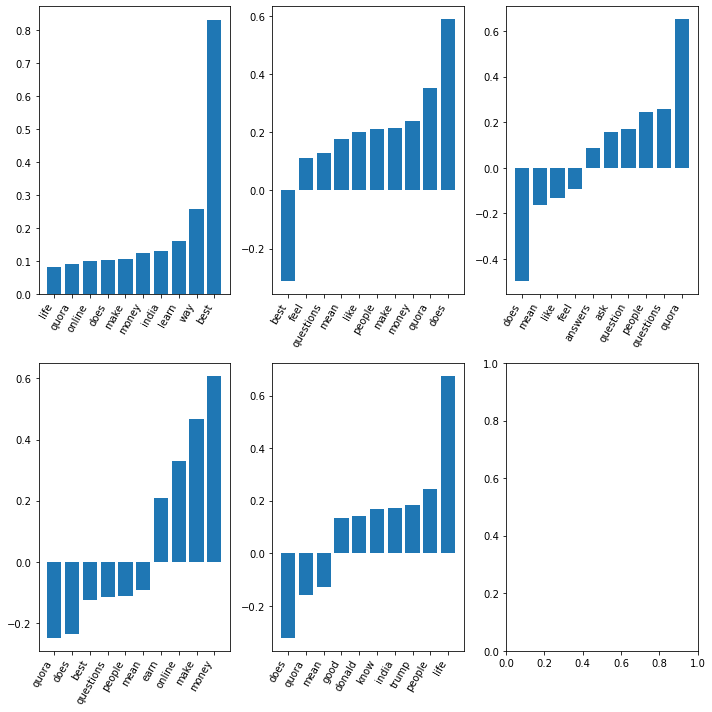

In [121]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 5
fig, axes = plt.subplots(2,3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), v):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

topic 1 - country 
topic 2 - quora search
topic 3 - answers
topic 4 - money
topic 5 - politics